# Train Model

In [1]:
from comet_ml import Experiment
from pytorch_lightning.loggers import CometLogger
import datasets
import torch
from architectures import *
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
import torchvision
from pytorch_lightning.loggers import MLFlowLogger

%config Completer.use_jedi = False

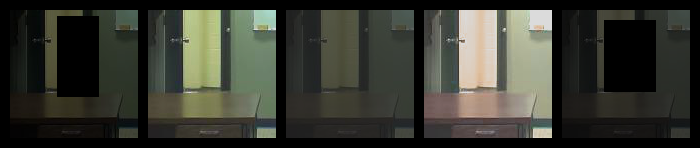

In [2]:
root = "dataset2014/dataset/baseline/office/groundtruth/"
dataset = datasets.ImageData("dataset2014/dataset/baseline/office/input/")
show = transforms.ToPILImage()

x,y  = dataset[55]

show = transforms.ToPILImage()
showSeq = lambda xs: [show(x.squeeze(0)) for x in torch.split(xs,1)]
showSeq(x)
grid = torchvision.utils.make_grid(x, nrow=10, padding=10)
show(grid)

In [3]:
#mlf_logger = MLFlowLogger(
#    experiment_name="default",
#    tracking_uri="file:./ml-runs"
#)

comet_logger = CometLogger(
    api_key="tMEjeyq5M7v1IPRCvS5fyGyuo",
    workspace="semjon", # Optional
    project_name="deep-sequences", # Optional
    # rest_api_key=os.environ["COMET_REST_KEY"], # Optional
    save_dir='.',
    experiment_name="test" # Optional
)

train_loader = DataLoader(dataset)
agg_params = { 
    "num_heads":8,
    "dim_feedforward":128,
    "num_layers":3
}
net = DeepAggNet(planes=16,agg_block="Attention",agg_params=agg_params)
trainer = pl.Trainer(gpus=1,logger=comet_logger)
trainer.fit(net, train_loader)

CometLogger will be initialized in online mode
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/semjon/deep-sequences/72b0406c36c44018931cdcb0c6773879


  | Name       | Type                 | Params
----------------------------------------------------
0 | input      | Conv2d               | 448   
1 | output     | Conv2d               | 435   
2 | downsample | Sequential           | 23.1 K
3 | upsample   | Sequential           | 23.1 K
4 | encoder    | Sequential           | 738 K 
5 | agg        | AttentionAggregation | 100 K 
6 | decoder    | Sequential           | 738 K 
7 | smooth     | Sequential           | 32.5 K
----------------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.628     Total estimated model params size (MB)


Epoch 0:  35%|███████████████▌                             | 711/2050 [00:58<01:50, 12.13it/s, loss=0.0793, v_num=3879]

C:\Users\simon\AppData\Local\Continuum\anaconda3\envs\DL\lib\site-packages\pytorch_lightning\utilities\distributed.py:50: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/semjon/deep-sequences/72b0406c36c44018931cdcb0c6773879
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [72]       : (0.03706912323832512, 0.4080166220664978)
COMET INFO:     train_loss [14] : (0.060909371823072433, 0.11651401966810226)
COMET INFO:   Others:
COMET INFO:     Name : test
COMET INFO:   Parameters:
COMET INFO:     agg_block          : Mean
COMET INFO:     decoder_num_blocks : 10
COMET INFO:     dim_feedforward    : 128
COMET INFO:     embed_dim          : 64
COMET INFO:     encoder_num_blocks : 10

COMET INFO:     num_heads          : 8
COMET INFO:     num_layers         : 3
COMET INFO:     planes             : 16
COMET INFO:     smooth_num_blocks  : 6
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (275 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     model graph              : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET INFO: Still uploading 2 file(s)


1

In [ ]:
import torchvision

dataset = torchvision.datasets.ImageFolder("dataset2014/dataset/baseline/highway/")
x,y = dataset[2001]
X = []

# Test whether aggregation moduls have correct dimensionality:
$ f : \mathcal{P}\left( \mathbb{R}^{(B \times C \times H \times W)} \right) \rightarrow \mathbb{R}^{(B \times C \times H \times W)} $ 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from architectures import *
from torch.utils.tensorboard import SummaryWriter
%config Completer.use_jedi = False

In [ ]:
S,B,C,H,W = 10, 5, 64, 256, 256    # Sequence length, Batch size, Channels, Height, Width
x = torch.rand(B, S, 3, H, W).cuda()

agg_params = { 
    "num_heads":8,
    "dim_feedforward":128,
    "num_layers":3
}
net = DeepAggNet(planes=16,agg_block="Attention",agg_params=agg_params).cuda()
#net = DeepAggNet()
net(x).size()

In [ ]:
net